<a href="https://colab.research.google.com/github/taran-aujla/ML-NN-genAi/blob/main/CNN(convolutional_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

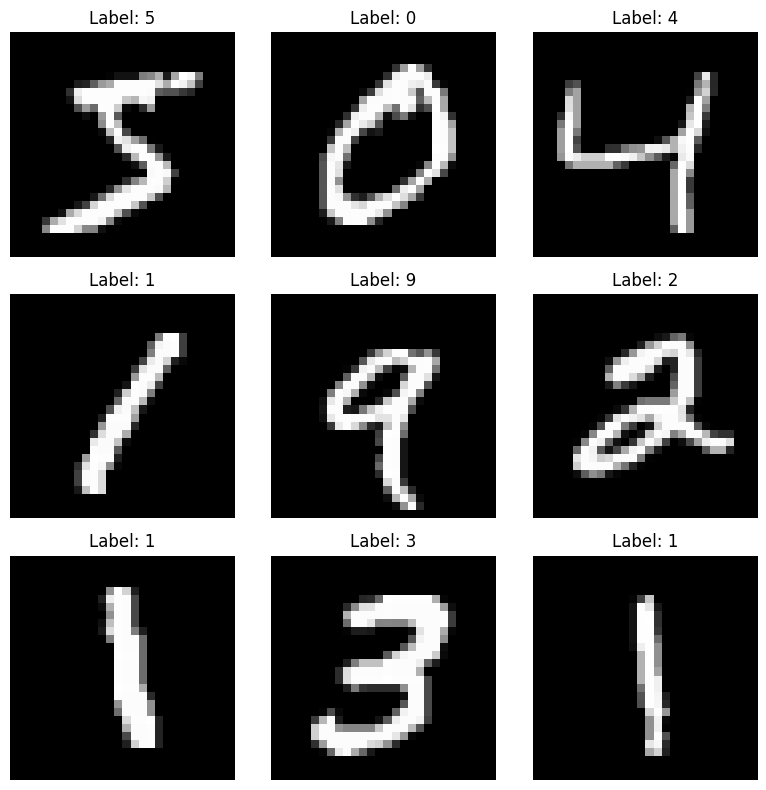

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

#data(MNIST dataset)
#MNIST images are initially loaded as a 3D array (num_samples, 28, 28).
#Convolutional layers in TensorFlow/Keras expect input tensors of shape (batch_size, height, width, channels).
(train_x,train_y),(test_x,test_y)=datasets.mnist.load_data()
train_x=train_x.reshape(60000,28,28,1)/255.0
test_x=test_x.reshape(10000,28,28,1)/255.0


#see the image of the input
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


#CNN full model
model=Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),

    #dense of normal layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

model.fit(train_x,train_y,epochs=5,validation_data=(test_x,test_y))

test_loss,accuracy=model.evaluate(test_x,test_y)
print(test_loss,accuracy)